In [146]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df = pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [147]:
duplicates = df.duplicated()
for index, is_duplicate in duplicates.items():
    if is_duplicate:
        print(f"Index: {index}, Duplicate: {is_duplicate}")

In [148]:
nan_data = df.isnull().sum()
print(nan_data)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [149]:
print(df.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [150]:
selected_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                    'airconditioning', 'parking', 'prefarea']
unique_values_selected = df[selected_columns].apply(lambda col: col.unique())
print(unique_values_selected)

mainroad              [yes, no]
guestroom             [no, yes]
basement              [no, yes]
hotwaterheating       [no, yes]
airconditioning       [yes, no]
parking            [2, 3, 0, 1]
prefarea              [yes, no]
dtype: object


In [151]:
type_mapping = {
    'mainroad': {'yes': True, 'no': False},
    'guestroom': {'yes': True, 'no': False},
    'basement': {'yes': True, 'no': False},
    'hotwaterheating': {'yes': True, 'no': False},
    'airconditioning': {'yes': True, 'no': False},
    'parking': {'2': 2, '3': 3, '0': 0, '1': 1},
    'prefarea': {'yes': True, 'no': False},
}
for col, mapping in type_mapping.items():
    df[col] = df[col].replace(mapping).astype(type(next(iter(mapping.values()))))
print(df.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad              bool
guestroom             bool
basement              bool
hotwaterheating       bool
airconditioning       bool
parking              int32
prefarea              bool
furnishingstatus    object
dtype: object


In [152]:
X = df.drop('price', axis=1)  # wszystkie kolumny oprócz 'price'
y = df['price'] 

In [153]:
X = pd.get_dummies(X)
print(X)

     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3      True      False     False   
1    8960         4          4        4      True      False     False   
2    9960         3          2        2      True      False      True   
3    7500         4          2        2      True      False      True   
4    7420         4          1        2      True       True      True   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1      True      False      True   
541  2400         3          1        1     False      False     False   
542  3620         2          1        1      True      False     False   
543  2910         3          1        1     False      False     False   
544  3850         3          1        2      True      False     False   

     hotwaterheating  airconditioning  parking  prefarea  \
0              False             True        2     

In [154]:

test_sizes = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

results = {}

for test_size in test_sizes:
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    results[test_size] = mse
    print(f"Test Size: {test_size}, MSE: {mse}")

results_df = pd.DataFrame(list(results.items()), columns=['Test Size', 'MSE'])
print(results_df)

Test Size: 0.1, MSE: 1451838962597.7993
Test Size: 0.15, MSE: 1349710647574.8796
Test Size: 0.2, MSE: 1754318687330.6633
Test Size: 0.25, MSE: 1552389233075.0447
Test Size: 0.3, MSE: 1523019469501.2905
Test Size: 0.35, MSE: 1439773479858.8489
Test Size: 0.4, MSE: 1506230725917.4543
Test Size: 0.45, MSE: 1434825920668.8323
Test Size: 0.5, MSE: 1366134163112.144
   Test Size           MSE
0       0.10  1.451839e+12
1       0.15  1.349711e+12
2       0.20  1.754319e+12
3       0.25  1.552389e+12
4       0.30  1.523019e+12
5       0.35  1.439773e+12
6       0.40  1.506231e+12
7       0.45  1.434826e+12
8       0.50  1.366134e+12


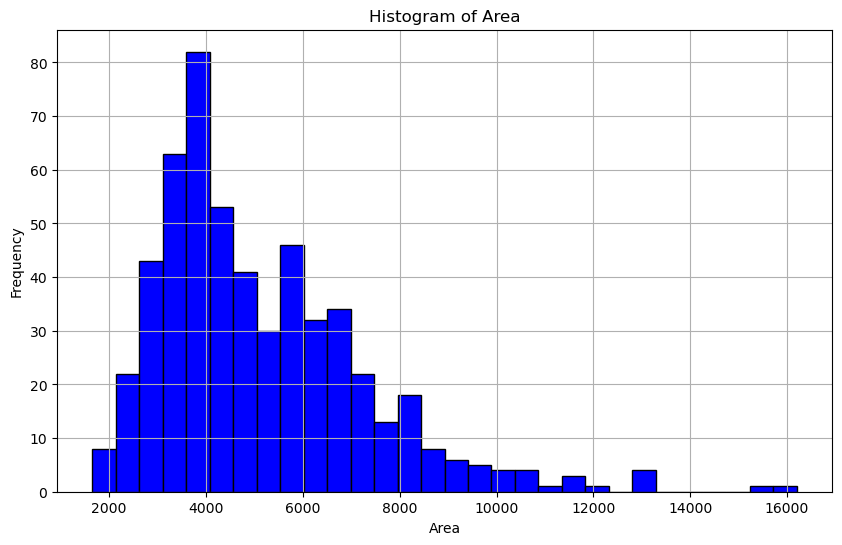

In [156]:
area_data = df['area']

plt.figure(figsize=(10, 6))
plt.hist(area_data, bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Area')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

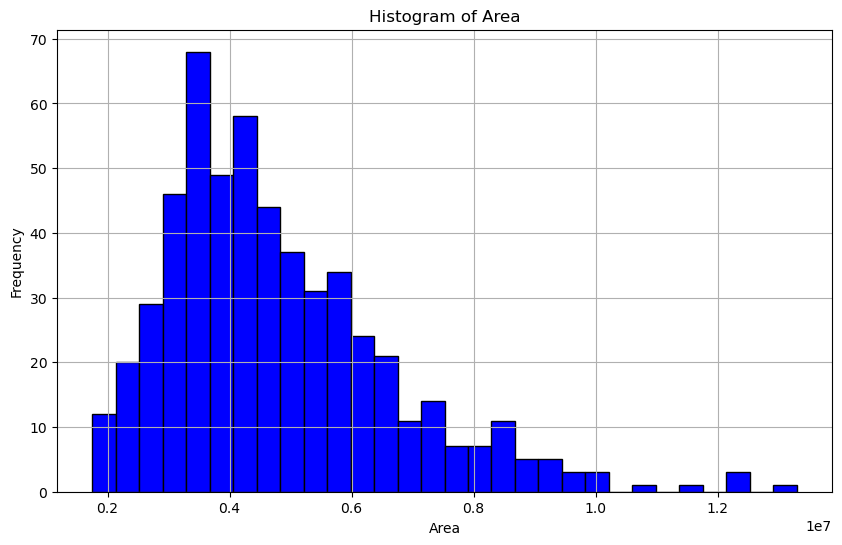

In [157]:
area_data = df['price']

plt.figure(figsize=(10, 6))
plt.hist(area_data, bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Area')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

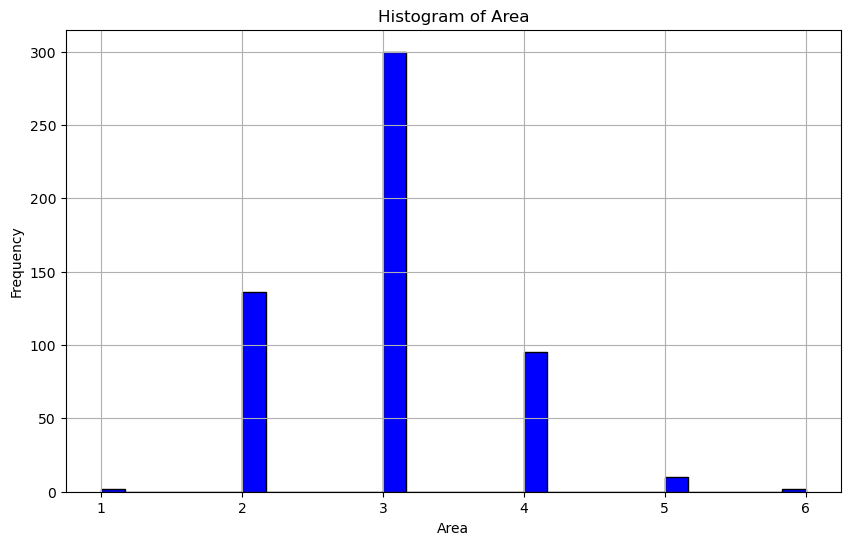

In [160]:
area_data = df['bedrooms']

# Tworzenie histogramu dla kolumny 'area'
plt.figure(figsize=(10, 6))
plt.hist(area_data, bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Area')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

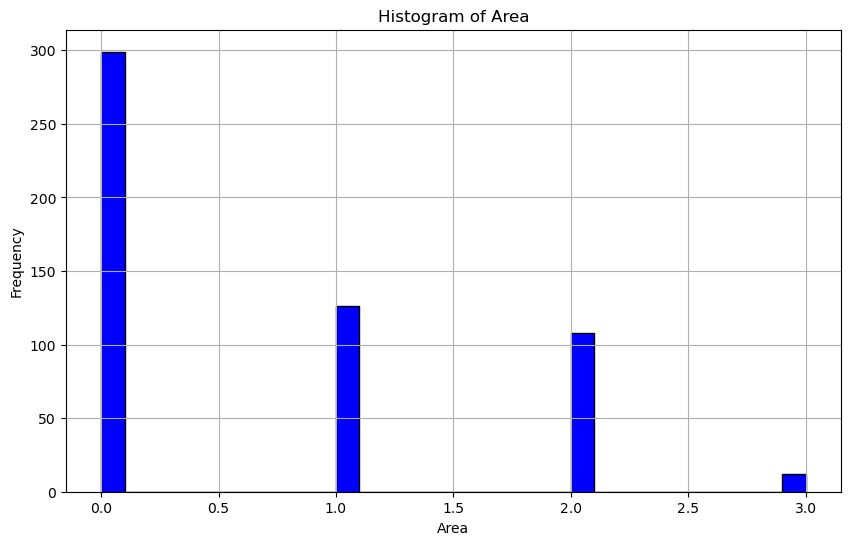

In [162]:
area_data = df['parking']

# Tworzenie histogramu dla kolumny 'area'
plt.figure(figsize=(10, 6))
plt.hist(area_data, bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Area')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

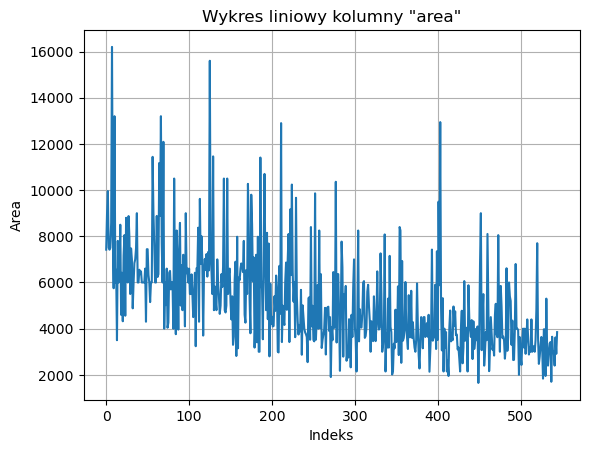

In [164]:
plt.plot(df['area'])
plt.title('Wykres liniowy kolumny "area"')
plt.xlabel('Indeks')
plt.ylabel('Area')
plt.grid(True)
plt.show()

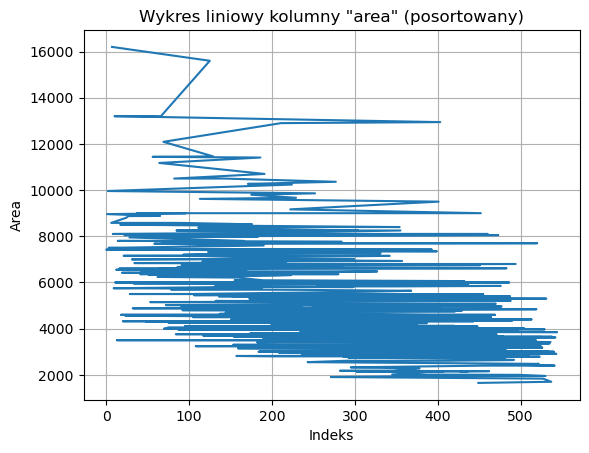

In [165]:
df_sorted = df.sort_values(by='area')

plt.plot(df_sorted['area'])
plt.title('Wykres liniowy kolumny "area" (posortowany)')
plt.xlabel('Indeks')
plt.ylabel('Area')
plt.grid(True)
plt.show()